# Car Collision in Seattle

## Data Preparation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
 !wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-21 16:11:13--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  45.9MB/s   in 1.5s   

2020-10-21 16:11:15 (45.9 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
collision = pd.read_csv('Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Exploration

In [4]:
collision.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
collision.shape

(194673, 38)

SEVERITYCODE is what we want to predict. Let see the data.

In [6]:
collision['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

From the document of the data set. Here are meaning of the data.
- Severity code 1 = Prop damage
- Severity code 2 = Injury

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ae760b240>]],
      dtype=object)

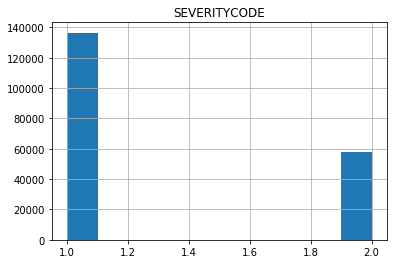

In [7]:
collision.hist(column='SEVERITYCODE')

In [8]:
collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [9]:
def PlotTwoCond(x_col, y_col, col_num):
    ax = coll_num[coll_num['SEVERITYCODE'] == 1].plot(kind='scatter', x=x_col, y=y_col, color='DarkBlue', label='1 = Prob damage', alpha=0.3);
    coll_num[coll_num['SEVERITYCODE'] == 2].plot(kind='scatter', x=x_col, y=y_col, color='Red', label='2 = Injury', ax=ax, alpha=0.3);
    plt.show()

In [10]:
collision.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

### Feature Selection

Remove no meaning and duplicated data from the data set

In [11]:
collision = collision.drop(columns=['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'LOCATION', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'SDOTCOLNUM', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'INTKEY', 'SEVERITYCODE.1', 'INCDTTM', 'INCDATE', 'SDOT_COLDESC'])

Remove data that has hight volumn of null which is easily lead to incorrect prediction (more than 50% of the data)

In [12]:
collision = collision.drop(columns=['EXCEPTRSNCODE', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING'])

In [13]:
collision.shape

(194673, 15)

In [14]:
collision.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


### Data Wrangling

#### Handle Null Value

Check null value in the data set

In [15]:
collision.isnull().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
HITPARKEDCAR        0
dtype: int64

ST_COLCODE contain blank data (' '). Change them to null.

In [16]:
collision['ST_COLCODE'].unique()

array(['10', '11', '32', '23', '5', '22', '14', '30', ' ', '28', '51',
       '13', '50', '12', '45', '0', '20', '21', '1', '52', '16', '15',
       '74', '81', '26', '19', '2', '66', '71', '3', '24', '40', '57',
       '6', '83', '25', '27', '4', '72', '29', '56', '73', '41', '17',
       '65', '82', '67', '49', '84', '31', '43', '42', '48', '64', '53',
       32, 50, 15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30,
       16, 40, 26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73,
       74, 72, 3, 84, 64, 57, 42, 41, 48, 66, 56, 31, 82, 67, '54', '60',
       53, 43, 87, 54, '87', nan, '7', '8', '85', '88', '18'],
      dtype=object)

In [17]:
collision['ST_COLCODE'].replace(' ', np.nan, inplace=True)

JUNCTIONTYPE contains some 'Unknown' value. Change them to null.

In [18]:
collision['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [19]:
collision['JUNCTIONTYPE'].replace('Unknown', np.nan, inplace = True)

UNDERINFL has both Y/N and 1/0 data. Change them to the same pattern.

In [20]:
collision['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [21]:
collision['UNDERINFL'].replace('Y', '1', inplace = True)
collision['UNDERINFL'].replace('N', '0', inplace = True)

Handle null value for the rest of the data by replace with the hightest frequency data

In [22]:
def ReplaceWithMaxFreq (df, column):
    m = df[column].value_counts().idxmax()
    print("The highest frequency data of "+ str(column) + " is: " + str(m))
    df[column].replace(np.nan, m, inplace=True)

In [23]:
ReplaceWithMaxFreq(collision, 'ADDRTYPE')
ReplaceWithMaxFreq(collision, 'COLLISIONTYPE')
ReplaceWithMaxFreq(collision, 'JUNCTIONTYPE')
ReplaceWithMaxFreq(collision, 'UNDERINFL')
ReplaceWithMaxFreq(collision, 'WEATHER')
ReplaceWithMaxFreq(collision, 'ROADCOND')
ReplaceWithMaxFreq(collision, 'LIGHTCOND')
ReplaceWithMaxFreq(collision, 'ST_COLCODE')

The highest frequency data of ADDRTYPE is: Block
The highest frequency data of COLLISIONTYPE is: Parked Car
The highest frequency data of JUNCTIONTYPE is: Mid-Block (not related to intersection)
The highest frequency data of UNDERINFL is: 0
The highest frequency data of WEATHER is: Clear
The highest frequency data of ROADCOND is: Dry
The highest frequency data of LIGHTCOND is: Daylight
The highest frequency data of ST_COLCODE is: 32


Change data of HITPARKEDCAR from Y/N to 1/0

In [24]:
collision['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [25]:
collision['HITPARKEDCAR'].replace("Y", "1", inplace = True)
collision['HITPARKEDCAR'].replace("N", "0", inplace = True)

In [26]:
collision.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
SDOT_COLCODE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64

#### Correct data types

In [27]:
collision.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
SDOT_COLCODE      int64
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
HITPARKEDCAR     object
dtype: object

In [28]:
collision[["ST_COLCODE"]] = collision[["ST_COLCODE"]].astype("int")
collision[["UNDERINFL"]] = collision[["UNDERINFL"]].astype("int")
collision[["HITPARKEDCAR"]] = collision[["HITPARKEDCAR"]].astype("int")

In [29]:
collision.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
SDOT_COLCODE      int64
UNDERINFL         int64
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE        int64
HITPARKEDCAR      int64
dtype: object

In [30]:
col = collision.copy()

In [31]:
col['COUNT'] = 1
col.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,COUNT
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Overcast,Wet,Daylight,10,0,1
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0,1
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0,1
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,23,0,1
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0,1


In [32]:
def PlotBySeverity(x_data, data):
    df = data[[x_data, 'SEVERITYCODE', 'COUNT']]
    df = df.groupby([x_data, 'SEVERITYCODE'],as_index=False).count()
    print(df)
    df.set_index(x_data, inplace=True)
    df.groupby('SEVERITYCODE')['COUNT'].plot(legend=True, figsize=(15, 6), grid=True, title="Number of Incident by Serverity with "+str(x_data))

       ADDRTYPE  SEVERITYCODE  COUNT
0         Alley             1    669
1         Alley             2     82
2         Block             1  98565
3         Block             2  30287
4  Intersection             1  37251
5  Intersection             2  27819


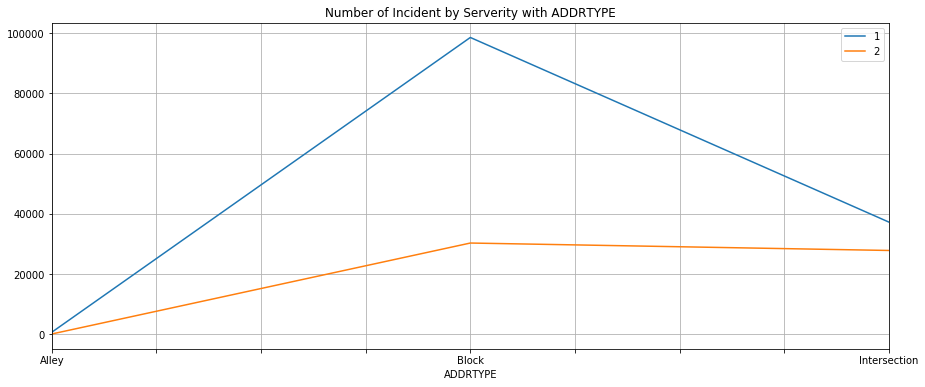

In [33]:
PlotBySeverity('ADDRTYPE', col)

   COLLISIONTYPE  SEVERITYCODE  COUNT
0         Angles             1  21050
1         Angles             2  13624
2         Cycles             1    671
3         Cycles             2   4744
4        Head On             1   1152
5        Head On             2    872
6      Left Turn             1   8292
7      Left Turn             2   5411
8          Other             1  17591
9          Other             2   6112
10    Parked Car             1  49188
11    Parked Car             2   3703
12    Pedestrian             1    672
13    Pedestrian             2   5936
14    Rear Ended             1  19419
15    Rear Ended             2  14671
16    Right Turn             1   2347
17    Right Turn             2    609
18     Sideswipe             1  16103
19     Sideswipe             2   2506


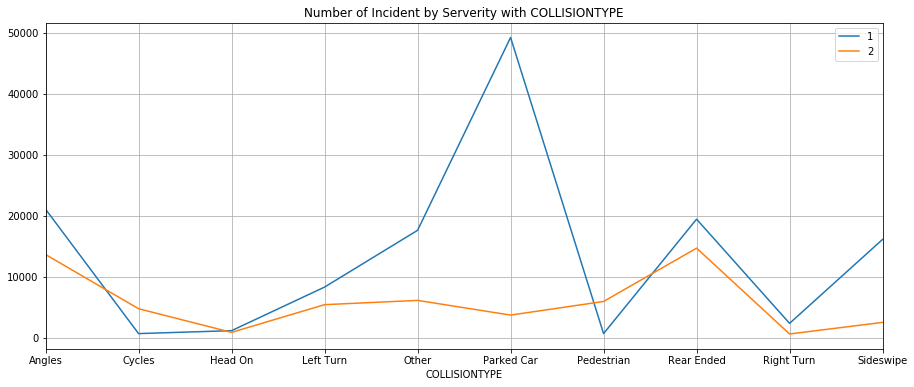

In [34]:
PlotBySeverity('COLLISIONTYPE', col)

    PERSONCOUNT  SEVERITYCODE  COUNT
0             0             1   3782
1             0             2   1762
2             1             1   9858
3             1             2   3296
4             2             1  86420
5             2             2  27811
6             3             1  22092
7             3             2  13461
8             4             1   8365
9             4             2   6295
10            5             1   3615
11            5             2   2969
12            6             1   1345
13            6             2   1357
14            7             1    494
15            7             2    637
16            8             1    249
17            8             2    284
18            9             1     87
19            9             2    129
20           10             1     54
21           10             2     74
22           11             1     23
23           11             2     33
24           12             1     13
25           12             2     20
2

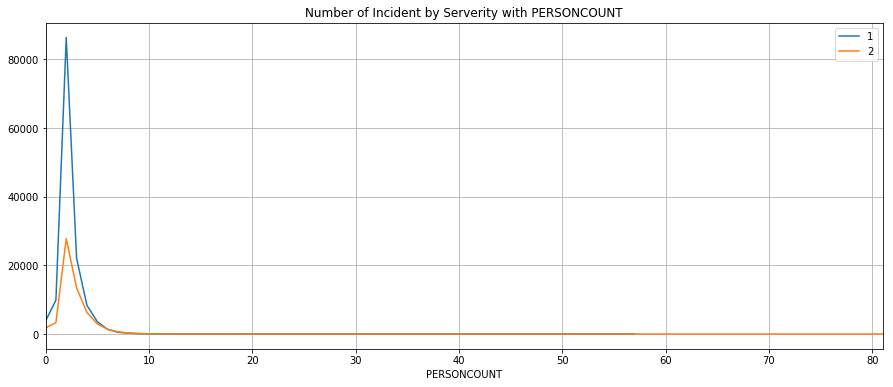

In [35]:
PlotBySeverity('PERSONCOUNT', col)

    PEDCOUNT  SEVERITYCODE   COUNT
0          0             1  135787
1          0             2   51947
2          1             1     678
3          1             2    6007
4          2             1      19
5          2             2     207
6          3             1       1
7          3             2      21
8          4             2       4
9          5             2       1
10         6             2       1


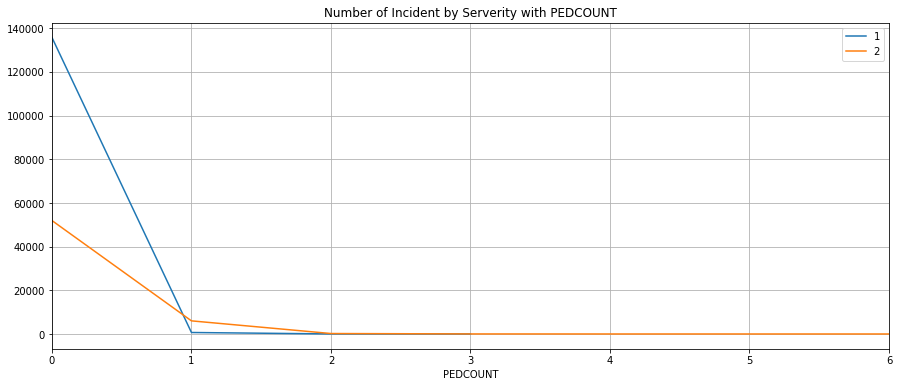

In [36]:
PlotBySeverity('PEDCOUNT', col)

   PEDCYLCOUNT  SEVERITYCODE   COUNT
0            0             1  135806
1            0             2   53383
2            1             1     679
3            1             2    4762
4            2             2      43


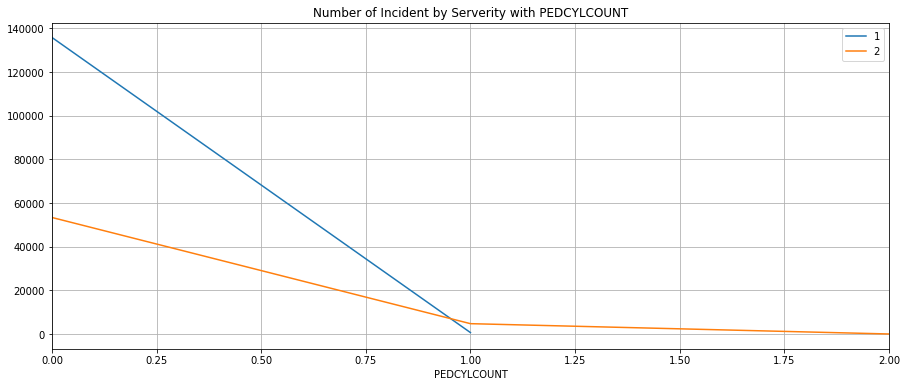

In [37]:
PlotBySeverity('PEDCYLCOUNT', col)

    VEHCOUNT  SEVERITYCODE   COUNT
0          0             1    3858
1          0             2    1227
2          1             1   11643
3          1             2   14105
4          2             1  111701
5          2             2   35949
6          3             1    7540
7          3             2    5470
8          4             1    1348
9          4             2    1078
10         5             1     268
11         5             2     261
12         6             1      86
13         6             2      60
14         7             1      24
15         7             2      22
16         8             1      10
17         8             2       5
18         9             1       3
19         9             2       6
20        10             2       2
21        11             1       3
22        11             2       3
23        12             1       1


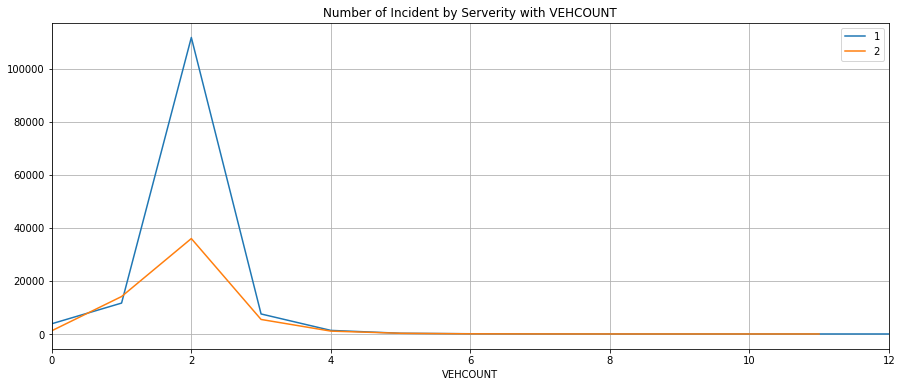

In [38]:
PlotBySeverity('VEHCOUNT', col)

                                         JUNCTIONTYPE  SEVERITYCODE  COUNT
0   At Intersection (but not related to intersection)             1   1475
1   At Intersection (but not related to intersection)             2    623
2              At Intersection (intersection related)             1  35636
3              At Intersection (intersection related)             2  27174
4                                   Driveway Junction             1   7437
5                                   Driveway Junction             2   3234
6                Mid-Block (but intersection related)             1  15493
7                Mid-Block (but intersection related)             2   7297
8             Mid-Block (not related to intersection)             1  76332
9             Mid-Block (not related to intersection)             2  19806
10                                      Ramp Junction             1    112
11                                      Ramp Junction             2     54


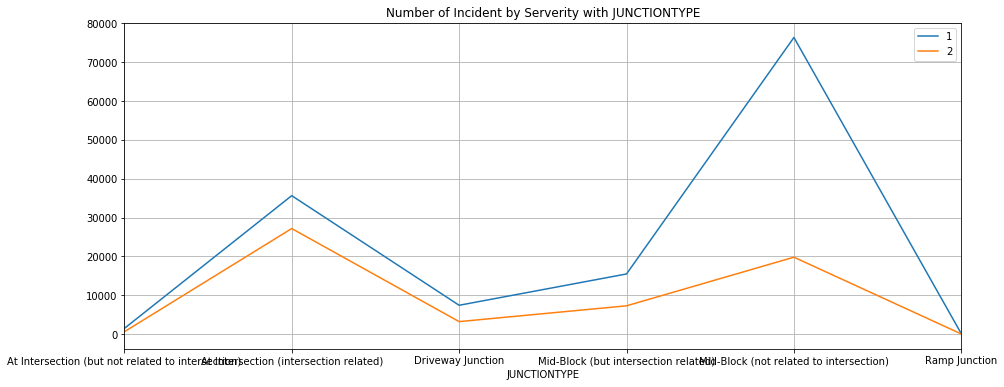

In [39]:
PlotBySeverity('JUNCTIONTYPE', col)

    SDOT_COLCODE  SEVERITYCODE  COUNT
0              0             1   9079
1              0             2    708
2             11             1  60871
3             11             2  24338
4             12             1   1413
5             12             2     27
6             13             1   5653
7             13             2    199
8             14             1  36551
9             14             2  17748
10            15             1   1529
11            15             2     75
12            16             1   9236
13            16             2    692
14            18             1    370
15            18             2   2734
16            21             1     41
17            21             2    140
18            22             1      1
19            22             2     16
20            23             1     31
21            23             2     93
22            24             1    665
23            24             2   5853
24            25             1     82
25          

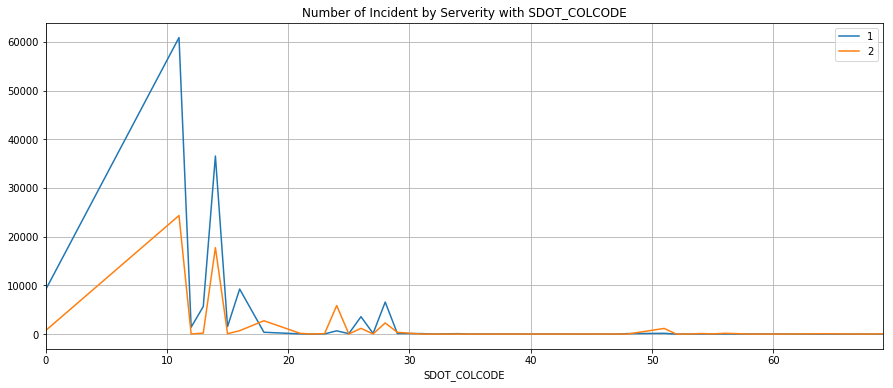

In [40]:
PlotBySeverity('SDOT_COLCODE', col)

   UNDERINFL  SEVERITYCODE   COUNT
0          0             1  130926
1          0             2   54626
2          1             1    5559
3          1             2    3562


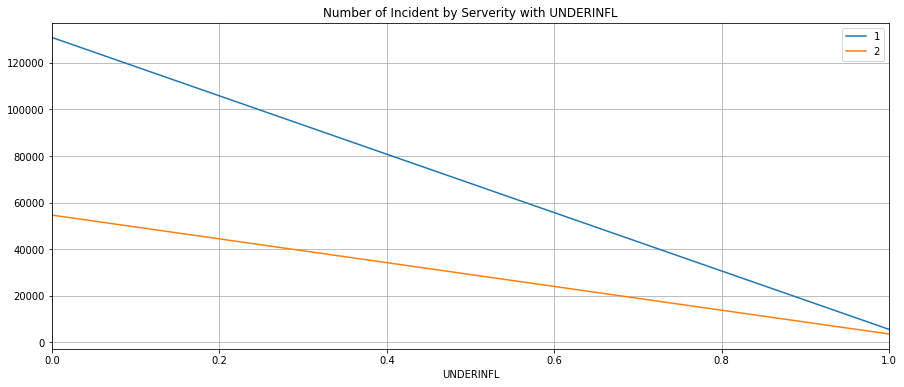

In [41]:
PlotBySeverity('UNDERINFL', col)

                     WEATHER  SEVERITYCODE  COUNT
0          Blowing Sand/Dirt             1     41
1          Blowing Sand/Dirt             2     15
2                      Clear             1  79292
3                      Clear             2  36924
4             Fog/Smog/Smoke             1    382
5             Fog/Smog/Smoke             2    187
6                      Other             1    716
7                      Other             2    116
8                   Overcast             1  18969
9                   Overcast             2   8745
10             Partly Cloudy             1      2
11             Partly Cloudy             2      3
12                   Raining             1  21969
13                   Raining             2  11176
14          Severe Crosswind             1     18
15          Severe Crosswind             2      7
16  Sleet/Hail/Freezing Rain             1     85
17  Sleet/Hail/Freezing Rain             2     28
18                   Snowing             1    736


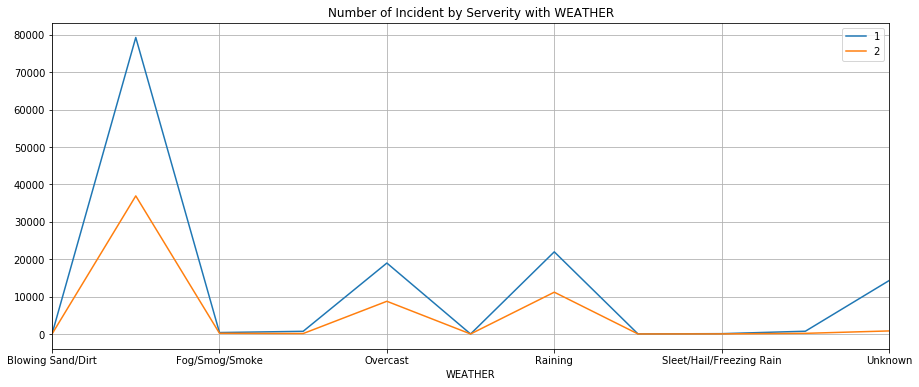

In [42]:
PlotBySeverity('WEATHER', col)

          ROADCOND  SEVERITYCODE  COUNT
0              Dry             1  88398
1              Dry             2  41124
2              Ice             1    936
3              Ice             2    273
4              Oil             1     40
5              Oil             2     24
6            Other             1     89
7            Other             2     43
8    Sand/Mud/Dirt             1     52
9    Sand/Mud/Dirt             2     23
10      Snow/Slush             1    837
11      Snow/Slush             2    167
12  Standing Water             1     85
13  Standing Water             2     30
14         Unknown             1  14329
15         Unknown             2    749
16             Wet             1  31719
17             Wet             2  15755


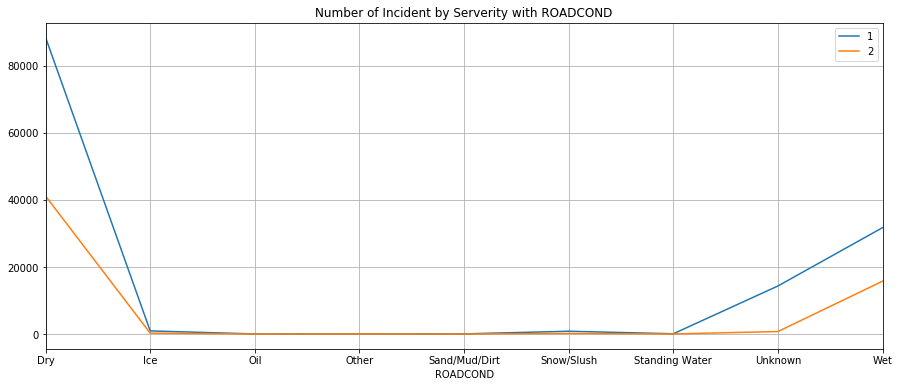

In [43]:
PlotBySeverity('ROADCOND', col)

                   LIGHTCOND  SEVERITYCODE  COUNT
0    Dark - No Street Lights             1   1203
1    Dark - No Street Lights             2    334
2   Dark - Street Lights Off             1    883
3   Dark - Street Lights Off             2    316
4    Dark - Street Lights On             1  34032
5    Dark - Street Lights On             2  14475
6    Dark - Unknown Lighting             1      7
7    Dark - Unknown Lighting             2      4
8                       Dawn             1   1678
9                       Dawn             2    824
10                  Daylight             1  81673
11                  Daylight             2  39634
12                      Dusk             1   3958
13                      Dusk             2   1944
14                     Other             1    183
15                     Other             2     52
16                   Unknown             1  12868
17                   Unknown             2    605


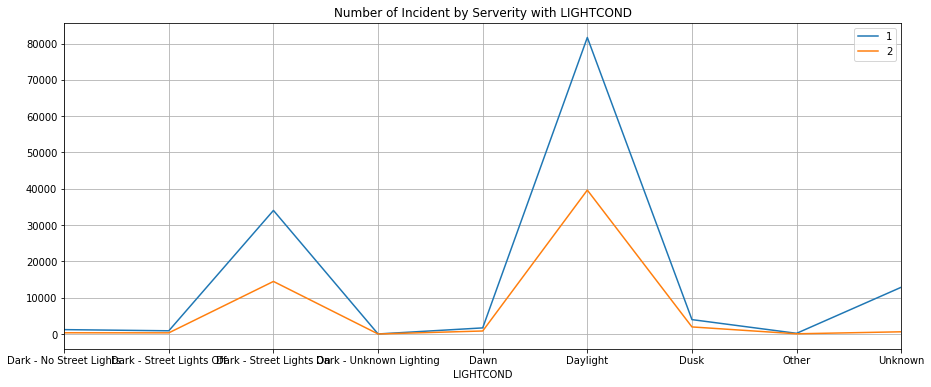

In [44]:
PlotBySeverity('LIGHTCOND', col)

     ST_COLCODE  SEVERITYCODE  COUNT
0             0             1    315
1             0             2   2567
2             1             1    142
3             1             2   1059
4             2             1    177
5             2             2   2001
6             3             1     23
7             3             2    213
8             4             1     15
9             4             2     96
10            5             1     60
11            5             2    356
12            6             1     29
13            6             2    228
14            7             1      1
15            7             2     17
16            8             1      2
17            8             2     21
18           10             1  21050
19           10             2  13624
20           11             1  11016
21           11             2   1761
22           12             1   2188
23           12             2    247
24           13             1   4575
25           13             2   3054
2

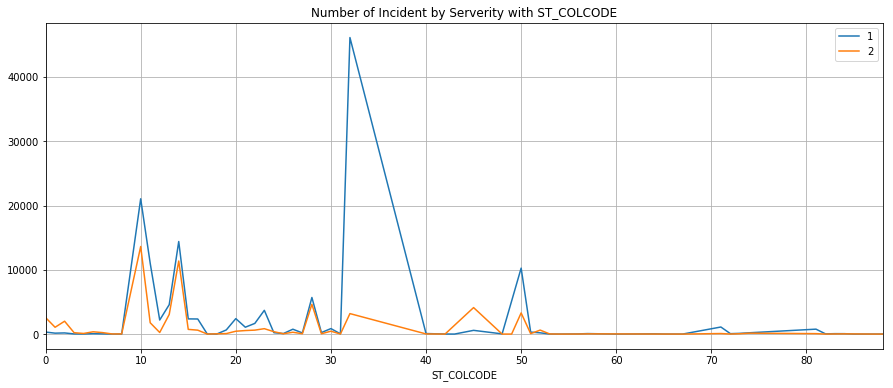

In [45]:
PlotBySeverity('ST_COLCODE', col)

   HITPARKEDCAR  SEVERITYCODE   COUNT
0             0             1  129717
1             0             2   57740
2             1             1    6768
3             1             2     448


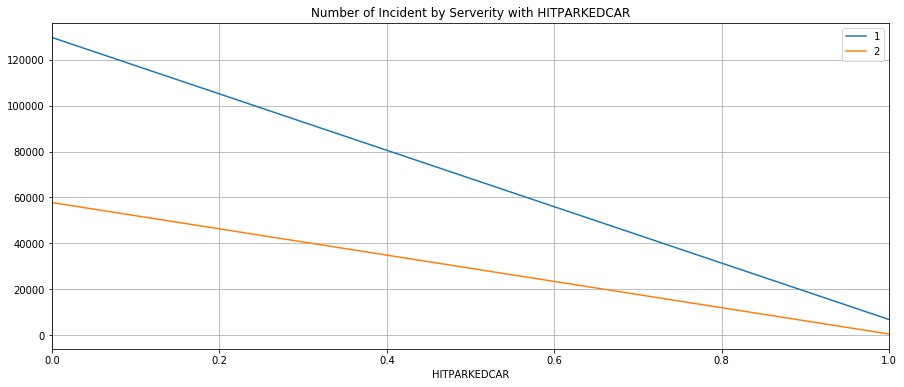

In [46]:
PlotBySeverity('HITPARKEDCAR', col)

### Final Data

In [47]:
collision.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Overcast,Wet,Daylight,10,0
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,23,0
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0


## Data Analysis

### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:
- 1: Total positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Total negative linear correlation.

In [48]:
collision.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE,HITPARKEDCAR
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.044377,-0.165233,-0.101498
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.022420,-0.220014,-0.052766
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.016592,-0.267586,-0.035264
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773,0.382521,-0.016401,0.194126,-0.030187
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000,-0.365814,0.006609,-0.257991,0.048845
SDOT_COLCODE,0.188905,-0.128960,0.260393,0.382521,-0.365814,1.000000,0.106783,0.267147,-0.095144
UNDERINFL,0.044377,0.022420,0.016592,-0.016401,0.006609,0.106783,1.000000,0.089723,0.010153
ST_COLCODE,-0.165233,-0.220014,-0.267586,0.194126,-0.257991,0.267147,0.089723,1.000000,0.116725
HITPARKEDCAR,-0.101498,-0.052766,-0.035264,-0.030187,0.048845,-0.095144,0.010153,0.116725,1.000000


When focus on data correlation with SEVERITYCODE, there is no data has correlation near to 1. Then there is no linear correlation with it.

### Decision Tree

#### Data Preparation

Sklearn Decision Trees do not handle categorical variables. Then convert them to numerical value.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [50]:
X = collision[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'HITPARKEDCAR']].values
X[0:5]

array([['Intersection', 'Angles', 2, 0, 0, 2,
        'At Intersection (intersection related)', 11, 0, 'Overcast',
        'Wet', 'Daylight', 10, 0],
       ['Block', 'Sideswipe', 2, 0, 0, 2,
        'Mid-Block (not related to intersection)', 16, 0, 'Raining',
        'Wet', 'Dark - Street Lights On', 11, 0],
       ['Block', 'Parked Car', 4, 0, 0, 3,
        'Mid-Block (not related to intersection)', 14, 0, 'Overcast',
        'Dry', 'Daylight', 32, 0],
       ['Block', 'Other', 3, 0, 0, 3,
        'Mid-Block (not related to intersection)', 11, 0, 'Clear', 'Dry',
        'Daylight', 23, 0],
       ['Intersection', 'Angles', 2, 0, 0, 2,
        'At Intersection (intersection related)', 11, 0, 'Raining',
        'Wet', 'Daylight', 10, 0]], dtype=object)

In [51]:
def ReplaceWithNumeric(x, value, location):
    num = preprocessing.LabelEncoder()
    num.fit(value)
    x[:,location] = num.transform(x[:,location])

In [52]:
ReplaceWithNumeric(X, ['Intersection', 'Block', 'Alley'], 0)
ReplaceWithNumeric(X, ['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles', 'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'], 1)
ReplaceWithNumeric(X, ['At Intersection (intersection related)', 'Mid-Block (not related to intersection)', 'Driveway Junction', 'Mid-Block (but intersection related)', 'At Intersection (but not related to intersection)', 'Ramp Junction'], 6)
ReplaceWithNumeric(X, ['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'], 9)
ReplaceWithNumeric(X, ['Wet', 'Dry', 'Unknown', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt', 'Standing Water', 'Oil'], 10)
ReplaceWithNumeric(X, ['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights', 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'], 11)
X[0:5]

array([[2, 0, 2, 0, 0, 2, 1, 11, 0, 4, 8, 5, 10, 0],
       [1, 9, 2, 0, 0, 2, 4, 16, 0, 6, 8, 2, 11, 0],
       [1, 5, 4, 0, 0, 3, 4, 14, 0, 4, 0, 5, 32, 0],
       [1, 4, 3, 0, 0, 3, 4, 11, 0, 1, 0, 5, 23, 0],
       [2, 0, 2, 0, 0, 2, 1, 11, 0, 6, 8, 5, 10, 0]], dtype=object)

In [53]:
y = collision["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

#### Data Normalization

In [54]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.39942178, -1.64247496, -0.33020207, -0.18743029, -0.16958841,
         0.12553783, -1.28468105, -0.41751024, -0.2217116 ,  0.34206956,
         1.50722693,  0.34496947, -0.90868474, -0.19619929],
       [-0.69049979,  1.63045406, -0.33020207, -0.18743029, -0.16958841,
         0.12553783,  0.90124663,  0.31042563, -0.2217116 ,  1.04697121,
         1.50722693, -1.42641774, -0.83925654, -0.19619929],
       [-0.69049979,  0.17581894,  1.15576451, -0.18743029, -0.16958841,
         1.7102107 ,  0.90124663,  0.01925128, -0.2217116 ,  0.34206956,
        -0.69828325,  0.34496947,  0.61873562, -0.19619929],
       [-0.69049979, -0.18783984,  0.41278122, -0.18743029, -0.16958841,
         1.7102107 ,  0.90124663, -0.41751024, -0.2217116 , -0.71528292,
        -0.69828325,  0.34496947, -0.00611816, -0.19619929],
       [ 1.39942178, -1.64247496, -0.33020207, -0.18743029, -0.16958841,
         0.12553783, -1.28468105, -0.41751024, -0.2217116 ,  1.04697121,
         1.50722693,  0.34

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 58402
number of training samples: 136271


In [56]:
coll_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
coll_tree.fit(X_train,y_train)
pred_tree = coll_tree.predict(X_test)
print (pred_tree[0:10])
print (y_test[0:10])

[1 1 1 2 1 1 2 1 1 1]
181980    2
163332    1
180525    1
1695      2
143631    2
63499     1
65001     2
159841    2
174858    2
25548     1
Name: SEVERITYCODE, dtype: int64


#### Evaluation

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))

DecisionTrees's Accuracy:  0.7537584329303791


### KNN

In [58]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [59]:
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [60]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7042567 , 0.73588233, 0.72194445, 0.74588199, 0.73252628,
       0.7441526 , 0.73726927, 0.74757714, 0.74273141])

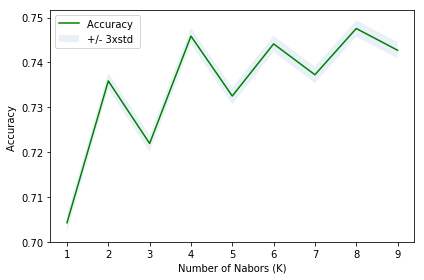

In [61]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [62]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7475771377692545 with k= 8


### Logistic Regression

In [63]:
import pylab as pl
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline 

In [64]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat[0:10]

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1])

In [65]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:10] #probability of [severity=1, severity=2]

array([[0.79101522, 0.20898478],
       [0.73350302, 0.26649698],
       [0.93087161, 0.06912839],
       [0.53392236, 0.46607764],
       [0.73258002, 0.26741998],
       [0.84699786, 0.15300214],
       [0.02361216, 0.97638784],
       [0.65183997, 0.34816003],
       [0.76677505, 0.23322495],
       [0.77839735, 0.22160265]])

#### Evaluation

In [66]:
#jaccard index
#If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7547344269031883

In [67]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[39775  1308]
 [13016  4303]]


Confusion matrix, without normalization
[[39775  1308]
 [13016  4303]]
              precision    recall  f1-score   support

           1       0.75      0.97      0.85     41083
           2       0.77      0.25      0.38     17319

   micro avg       0.75      0.75      0.75     58402
   macro avg       0.76      0.61      0.61     58402
weighted avg       0.76      0.75      0.71     58402



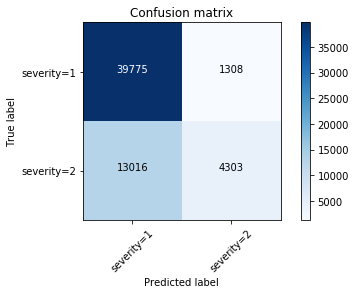

In [68]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=2'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate precision and recall of each class.

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.71 in our case.

In [69]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7074132427785005

In [70]:
#In logistic regression, the output can be the probability of severity. This probability is a value between 0 and 1. 
#Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5139383615360318

### SVM

In [71]:
import scipy.optimize as opt
%matplotlib inline 

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

#### Evaluation

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=2'],normalize= False,  title='Confusion matrix')

In [ ]:
print("SVM's F1 Score: ", f1_score(y_test, yhat, average='weighted'))
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))